## Insync Top KPI Workflow Example

#### This Python Jupyter Notebook seeks to highlight the use of fundamental data and data science to determine the top fundamental line item - or key performance indicator (KPI) - for a stock, and the trend in top KPIs for a stock.


In [19]:
#includes and settings
from src.data_objects import *

import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use('Solarize_Light2')

### First we establish a ticker list and instantiate a Portfolio object.
#### Portfolio will handle getting prices from yfinance, earnings report dates from Alpha Vantage, and calculating the five day alpha 
#### Alpha is defined here as stock return in excess of beta adjusted market return [60 day rolling beta]

#### The data files in this example were pre-generated by the setup.py file in the example repo.

In [20]:
focus_list = ["ADBE", "AMZN", "LMT", "LOW", "ORLY"]
pm = Portfolio(focus_list)


##### Get price data for our portfolio and the market (SPY)

In [21]:
df = pm.price_data.head()
df

ticker,price_date,SPY,ADBE,AMZN,LMT,LOW,ORLY
0,2012-01-03,103.202293,28.570000,8.9515,57.813770,20.818096,78.150002
1,2012-01-04,103.364182,28.280001,8.8755,57.031364,21.593065,79.339996
2,2012-01-05,103.639404,28.480000,8.8805,56.439255,21.511492,80.410004
3,2012-01-06,103.372299,28.719999,9.1305,56.375820,21.487020,79.860001
4,2012-01-09,103.623230,28.530001,8.9280,56.418114,21.291233,80.400002


##### View the Insync Fundamental dataframe for AMZN

In [22]:
pm.get_fundamental_data(ticker="AMZN").tail()

,ticker,companyname,lineitem,year,quarter,webfiscalperiod,outputorfield,numberonly,linesequence,category,...,ltcode,currency,uic,period,restatement,insncupdatedate,scaler,filing_date,month,filing_date_ym
17432,AMZN,Amazon.com Inc,-Sortation & Delivery Centers & Transportatio...,2022,1Q,1Q22,A,19600.0,406,KM,...,KM_S_290,USD,I_154-295,Q1,0,4/28/2022,Mn,3/31/2022,03,2022-03
17433,AMZN,Amazon.com Inc,-Sortation & Delivery Centers & Transportatio...,2022,2Q,2Q22,A,19300.0,406,KM,...,KM_S_290,USD,I_154-295,Q2,0,7/28/2022,Mn,6/30/2022,06,2022-06
17434,AMZN,Amazon.com Inc,-Sortation & Delivery Centers & Transportatio...,2022,3Q,3Q22,A,19900.0,406,KM,...,KM_S_290,USD,I_154-295,Q3,0,10/27/2022,Mn,9/30/2022,09,2022-09
17435,AMZN,Amazon.com Inc,-Sortation & Delivery Centers & Transportatio...,2022,4Q,4Q22,A,24700.0,406,KM,...,KM_S_290,USD,I_154-295,Q4,0,2/2/2023,Mn,12/31/2022,12,2022-12
17437,AMZN,Amazon.com Inc,-Sortation & Delivery Centers & Transportatio...,2023,1Q,1Q23,A,19900.0,406,KM,...,KM_S_290,USD,I_154-295,Q1,0,4/27/2023,Mn,3/31/2023,03,2023-03


##### There are 350 unique KPI line items in the AMZN Insyc dataframe

In [23]:
print((pm.get_fundamental_data("AMZN")['lineitem'].unique()))

['Total Revenue' '  Q/Q - Total Revenue' '  Y/Y - Total Revenue'
 'COGS (Ex-SBC)' 'Gross Profit (Ex-SBC)'
 '  Margin - Gross Profit (Ex-SBC)'
 '  Incr. Margin (Y/Y) - Gross Profit (Ex-SBC)'
 '  Change in BPS - Gross Profit (Ex-SBC)'
 'Gross Profit (Incl-Fulfillment)'
 '  Margin - Gross Profit (Incl-Fulfillment)'
 '  Incr. Margin (Y/Y) - Gross Profit (Incl-Fulfillment)' 'COGS'
 'Gross Profit' '  Margin - Gross Profit'
 '  Incr. Margin (Y/Y) - Gross Profit' '  Change in BPS - Gross Profit'
 '  Fulfillment - Opex (Ex-SBC & Other)'
 '    % Revenue - Fulfillment - Opex (Ex-SBC & Other)'
 '    Q/Q - Fulfillment - Opex (Ex-SBC & Other)'
 '    Y/Y - Fulfillment - Opex (Ex-SBC & Other)'
 '    Change in BPS - Fulfillment - Opex (Ex-SBC & Other)'
 '  Marketing - Opex (Ex-SBC & Other)'
 '    % Revenue - Marketing - Opex (Ex-SBC & Other)'
 '    Q/Q - Marketing - Opex (Ex-SBC & Other)'
 '    Y/Y - Marketing - Opex (Ex-SBC & Other)'
 '    Change in BPS - Marketing - Opex (Ex-SBC & Other)'
 '  Technol

##### Calculate the 5 day post-earnings report alpha for each stock in our portfolio

In [24]:
pm.get_alphas()
pm.earnings_alpha.head()

,price_date,five_day_alpha_shifted,rdate,fdate,surprise_pct,ticker,filing_date_ym
116,2012-06-19,-0.020163,2012-06-19,2012-05-31,1.6949,ADBE,2012-05
180,2012-09-19,0.008519,2012-09-19,2012-08-31,0.0000,ADBE,2012-08
238,2012-12-13,0.053594,2012-12-13,2012-11-30,7.0175,ADBE,2012-11
302,2013-03-19,0.037441,2013-03-19,2013-02-28,12.9032,ADBE,2013-02
365,2013-06-18,0.052522,2013-06-18,2013-05-31,5.8824,ADBE,2013-05


##### Calculate the rolling beta (OLS is from Statsmodels) for each stock in our portfolio

##### The regression is KPI vs 5 day alpha 

In [25]:
pm.get_rolling_ols(force=False)

##### Note that we have 5 categories of data in the Insync database, but we will be filtering down to KM and IS ... 
##### Key Metrics and Income Statement

In [26]:
pm.fundamentals['category'].unique()

array(['IS', 'CF', 'BS', 'SD', 'KM'], dtype=object)

##### There are 762 individual KPI codes in our Portfolio dataset 
##### How do we decide which ones to focus on?

In [27]:
df = pm.fundamentals.groupby('ltcode').first().reset_index()[['lineitem','ltcode']]
code_dict = pd.Series(df.lineitem.values,index=df.ltcode).to_dict()
print(f"This set of tickers contains {len(code_dict)} individual KPI codes")

This set of tickers contains 734 individual KPI codes


##### Here is the dataset for our Rolling Betas we calculated above for AMZN

In [28]:
df = pm.rolling_ols_data
df=df.replace({"ltcode": code_dict}).reset_index()
df = df.loc[:,~df.columns.duplicated()].copy()
df.loc[df['ticker']=='AMZN'].head()

,index,ticker,numberonly,filing_date,filing_date_ym,ltcode,category,five_day_alpha_shifted,rdate,fdate,surprise_pct,Intercept,numberonly.1,r_squared
81,81,AMZN,135723.719511,3/31/2012,2012-03,Total Revenue,IS,0.176717,2012-04-26,2012-03-31,-85.7143,-0.008755,1.710451e-07,0.133247
82,82,AMZN,21293.063147,6/30/2012,2012-06,Total Revenue,IS,0.045155,2012-07-26,2012-06-30,-50.0000,0.016311,1.153244e-07,0.085585
83,83,AMZN,-56678.434312,9/30/2012,2012-09,Total Revenue,IS,0.047632,2012-10-25,2012-09-30,87.5000,0.030958,4.754088e-08,0.009429
84,84,AMZN,-798914.345624,12/31/2012,2012-12,Total Revenue,IS,0.022211,2013-01-29,2012-12-31,0.0000,0.045487,3.533746e-08,0.042071
85,85,AMZN,212182.519599,3/31/2013,2013-03,Total Revenue,IS,-0.090562,2013-04-25,2013-03-31,-87.5000,0.037563,1.251389e-08,0.003671


##### As mentioned, we are filtered to two categories

In [29]:
df['category'].unique()

array(['IS', 'KM'], dtype=object)

##### AMZN EPS appears historically uncorrelated to 5 day alpha, which we might expect, but what KPI DOES correlate?

[]

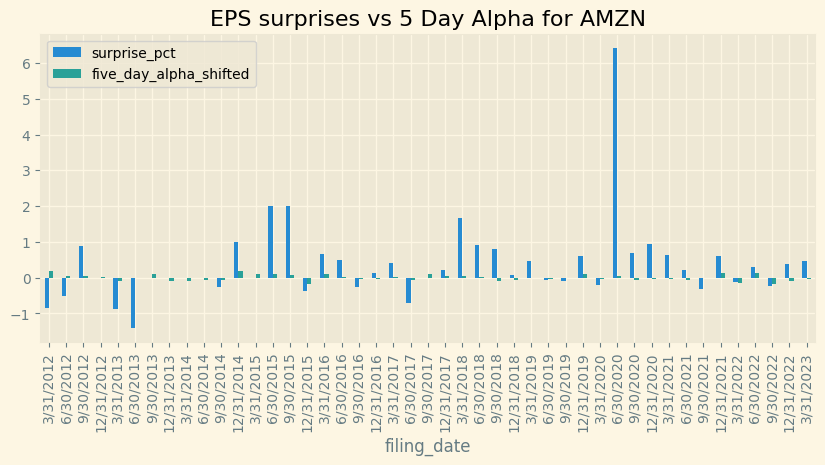

In [30]:
df_plot = df[(df['ticker']=='AMZN')].copy()
df_plot['surprise_pct'] = df_plot['surprise_pct']/100
df_plot = df_plot.groupby('filing_date_ym').first().reset_index()
ax = df_plot.plot(x='filing_date',y=['surprise_pct','five_day_alpha_shifted'],title = "EPS surprises vs 5 Day Alpha for AMZN",kind='bar',figsize = (10, 4))
ax.legend(loc=2)
ax.plot()


##### Here's the full dataset of Rolling Beta calculation, grouped into top 5 KPI of each ticker in the portfolio

In [31]:
df = pm.rolling_ols_data
df=df.replace({"ltcode": code_dict}).reset_index()
df = df.loc[:,~df.columns.duplicated()].copy()
df = df.groupby(['ticker','ltcode']).filter(lambda x: len(x) > 7)
df = df.sort_values('filing_date_ym').groupby(['ticker','ltcode']).last()
df = df.sort_values('r_squared').groupby(['ticker']).tail(5).reset_index().sort_values(['ticker','r_squared'],ascending=[True,False])
df = df.drop(columns=['index'])
#df.round(2)
f = {'r_squared':'{:.2f}','surprise_pct':'{:.2f}','Intercept':'{:.2f}','five_day_alpha_shifted':'{:.2f}'}
df.style.format(f).bar(subset='r_squared')

,ticker,ltcode,numberonly,filing_date,filing_date_ym,category,five_day_alpha_shifted,rdate,fdate,surprise_pct,Intercept,numberonly.1,r_squared
22,AAP,Net Inventories,0.055000,12/31/2022,2022-12,KM,-0.08,2023-02-28,2022-12-31,20.50,0.00,-1.352218,0.63
16,AAP,D&A,0.086611,12/31/2022,2022-12,IS,-0.08,2023-02-28,2022-12-31,20.50,-0.07,0.209145,0.53
15,AAP,EBIT by Segment,-5.055894,12/31/2022,2022-12,IS,-0.08,2023-02-28,2022-12-31,20.50,-0.03,0.012625,0.52
14,AAP,Net Interest & Other Income/Expense (Ex-1x Items),-0.629802,12/31/2022,2022-12,IS,-0.08,2023-02-28,2022-12-31,20.50,-0.05,-0.036600,0.51
12,AAP,% 3rd Party Units,-0.082159,12/31/2022,2022-12,KM,-0.08,2023-02-28,2022-12-31,20.50,-0.07,0.231758,0.49
28,ADBE,Net Interest & Other Income/Expenses,-1.324324,2/28/2023,2023-02,IS,0.07,2023-03-15,2023-02-28,3.26,0.00,-0.047460,0.80
18,ADBE,"Q/Q - Opex (Ex-1x Items, SBC & Amortization)",9.989091,2/28/2023,2023-02,IS,0.07,2023-03-15,2023-02-28,3.26,0.00,0.003430,0.56
13,ADBE,R&D - SBC,0.339744,2/28/2023,2023-02,IS,0.07,2023-03-15,2023-02-28,3.26,-0.09,0.338371,0.50
11,ADBE,Total Bookings,58955.195874,2/28/2023,2023-02,KM,0.07,2023-03-15,2023-02-28,3.26,-0.01,0.000000,0.48
5,ADBE,Interest Expense,0.142857,2/28/2023,2023-02,IS,0.07,2023-03-15,2023-02-28,3.26,-0.02,0.589061,0.43


##### Total Portfolio, top 5 for each ticker in chart form

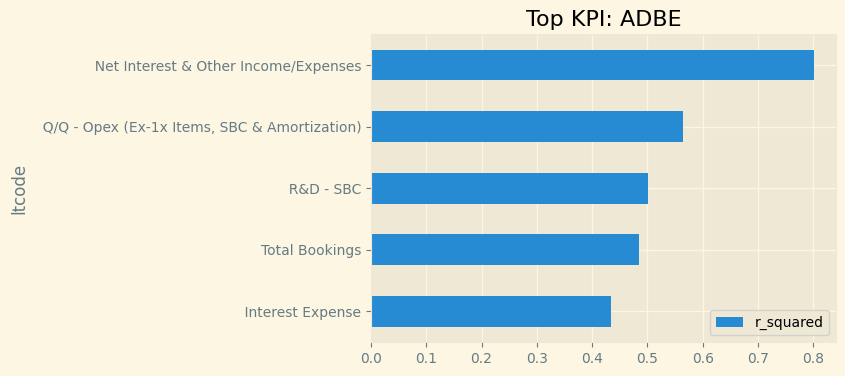

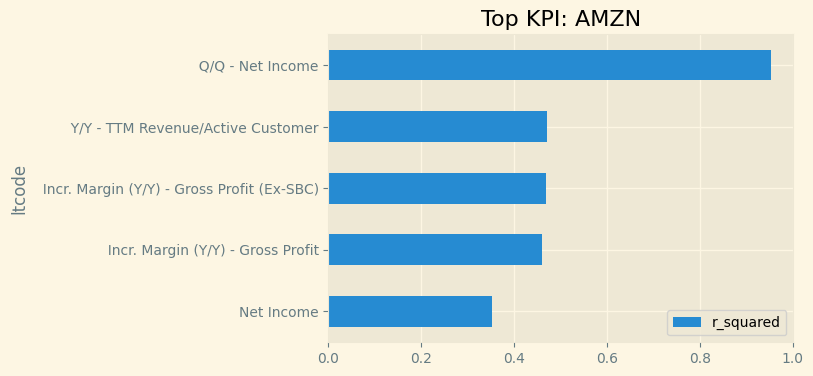

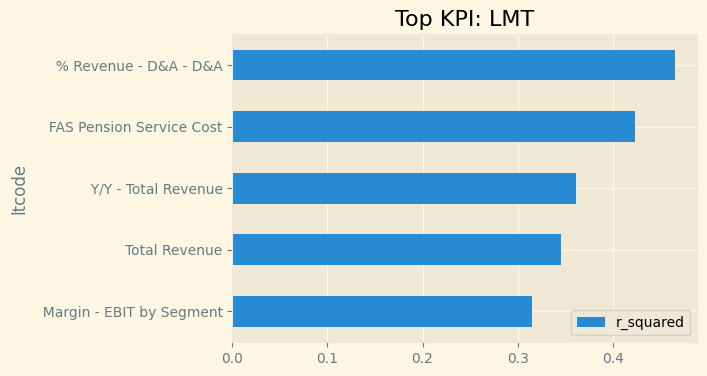

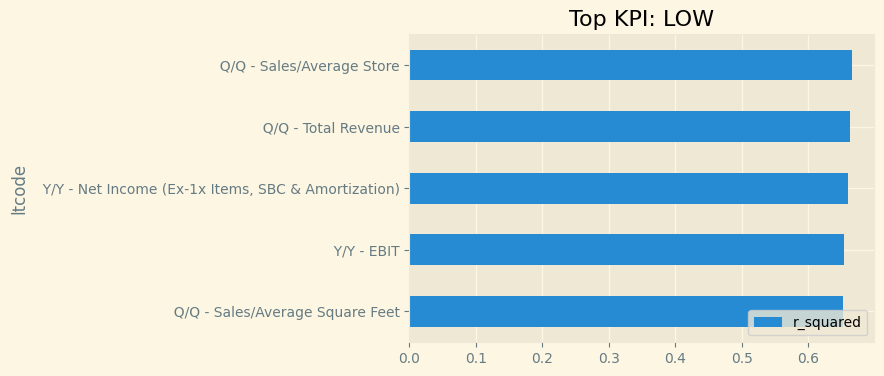

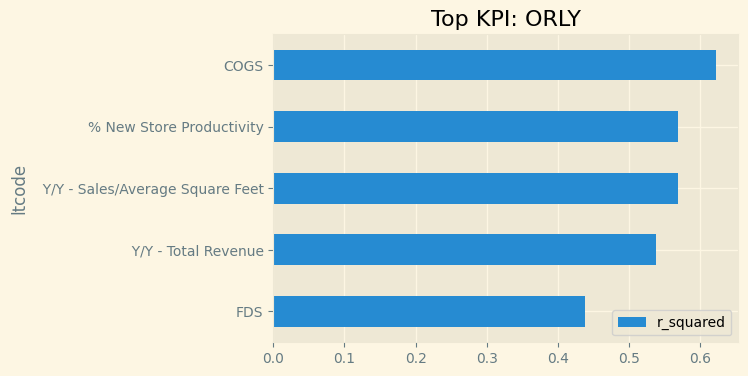

In [32]:

for ticker in focus_list:
    df_plot = df[df['ticker']==ticker].copy()
    df_plot.sort_values('r_squared',inplace=True)
    ax = df_plot.plot(x='ltcode',y='r_squared',kind='barh',title = f"Top KPI: {ticker}",figsize = (6, 4))
    ax.legend(loc=4)
    ax.plot()


##### Lastly we can look at the TREND in each of these top 5 tickers.
##### For example, Net Income at AMZN appears to be increasingly important whereas previously it had not been
##### So if we say, AMZN doesn't trade on Net Income, well, now it appears to!
##### Caveat: these are short time series (as all financial fundamental time series are) and the conclusions drawn therefrom are stochastic, not deterministic

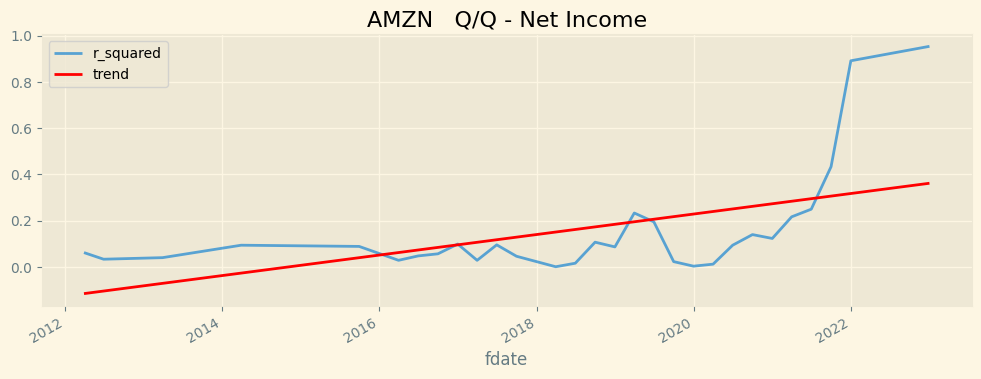

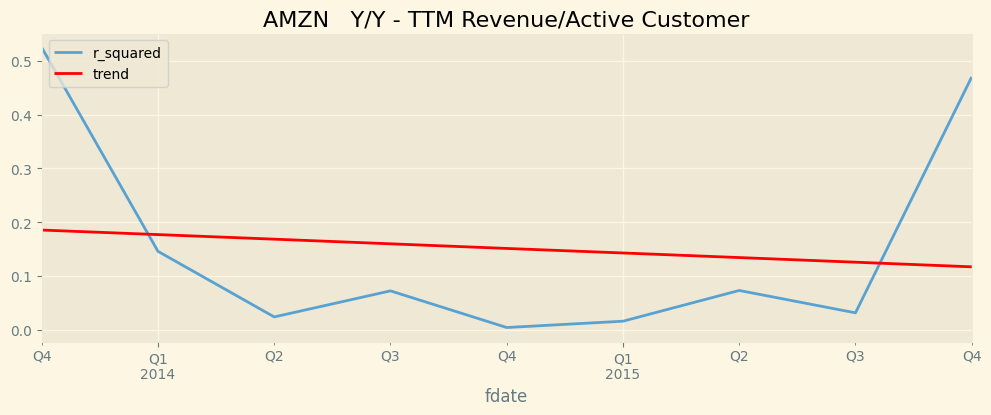

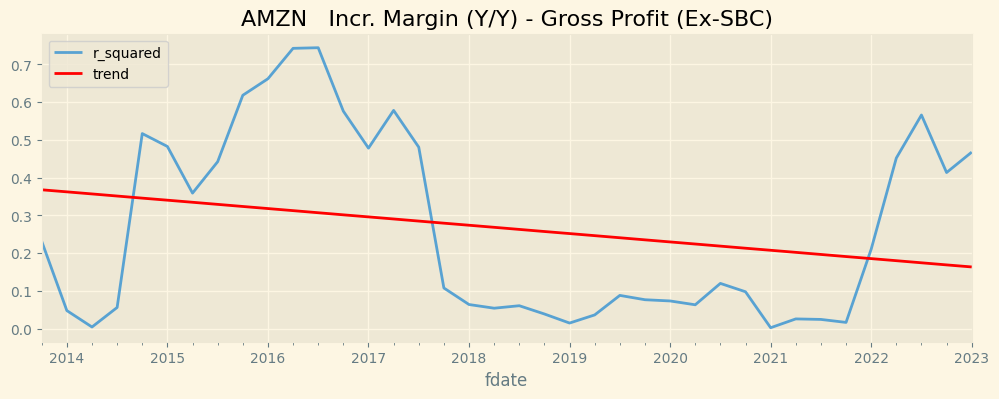

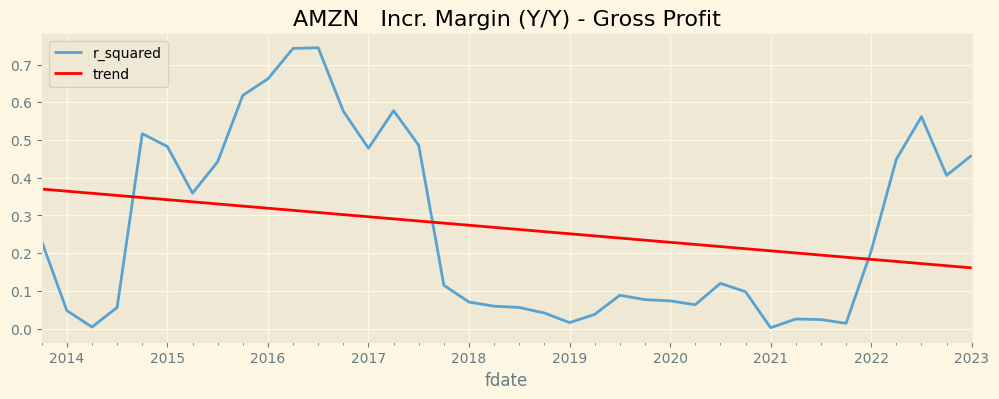

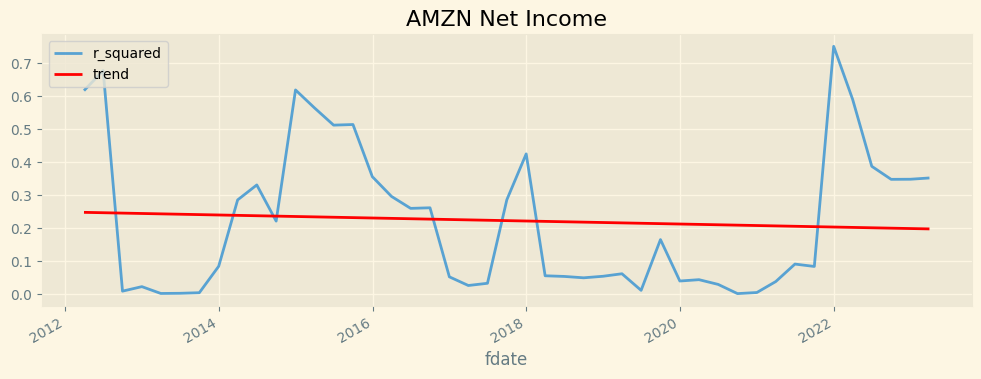

In [33]:
from scipy import stats
import datetime as dt

df = pm.rolling_ols_data
df=df.replace({"ltcode": code_dict})

df = df.groupby(['ticker','ltcode']).filter(lambda x: len(x) > 7)
df_grouped = df.sort_values('fdate').groupby(['ticker','ltcode']).last().reset_index()
df_grouped = df_grouped.sort_values('r_squared').groupby(['ticker']).tail(5).reset_index().sort_values(['ticker','r_squared'],ascending=[True,False])

filtered_focus_list = ['AMZN']
for ticker in filtered_focus_list:
    df_plot = df_grouped[df_grouped['ticker']==ticker].copy()
    df_plot.sort_values('r_squared',inplace=True,ascending=False)
    titles = df_plot['ltcode'].unique()
    for title in titles:
        df_plot = df[df['ltcode']==title].copy()
        df_plot = df_plot[df_plot['ticker']==ticker].copy()
        df_plot['fdate'] = pd.to_datetime(df_plot['fdate'])
        x = df_plot["fdate"].map(dt.datetime.toordinal)
        
        y = df_plot['r_squared']
        m = stats.linregress(x, y)
        t = [m.slope * i + m.intercept for i in x]
        df_plot.insert(len(df_plot.columns),'trend',t)

        title = df_plot.iloc[0]["ltcode"]
        ax = df_plot.plot(x='fdate',y='r_squared',kind = 'line',title = f"{ticker} {title}",alpha=0.75, rot=90)
        ax = df_plot.plot.line(x='fdate',
                    y='trend', 
                    color='red', 
                    ax=ax, 
                    figsize = (12,4))
        #
        ax.legend(loc=2)
        ax.plot()

